### Predicitng students enrollment volume based on the number of marketing campaigns launched.


#### Import Data

In [1]:
#import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load data into dataframe and validate
df = pd.read_csv(r"C:\Users\Administrator\Desktop\Datatechcon\final projects ML\student_enrollments_ml.csv")
df.head()

,campaigns,Enrollments
0,3,21
1,5,47
2,3,27
3,9,75
4,4,30


In [3]:
df.tail()

,campaigns,Enrollments
24,8,86
25,10,105
26,8,89
27,5,59
28,6,66


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   campaigns    29 non-null     int64
 1   Enrollments  29 non-null     int64
dtypes: int64(2)
memory usage: 592.0 bytes


In [5]:
df.isnull()

,campaigns,Enrollments
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [6]:
df.duplicated().any()

True

- There are 29 observations with 2 columns of datatypes int64
- No missing value recorded
- Contains duplicates

In [7]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20     True
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
dtype: bool

In [8]:
df=df.drop_duplicates()
df

,campaigns,Enrollments
0,3,21
1,5,47
2,3,27
3,9,75
4,4,30
5,2,20
6,9,88
7,6,60
8,8,81
9,3,25


In [9]:
df.describe()

,campaigns,Enrollments
count,28.000000,28.000000
mean,5.535714,56.285714
std,2.501587,26.371782
min,1.000000,17.000000
25%,3.000000,30.000000
50%,5.500000,59.500000
75%,8.000000,77.250000
max,10.000000,105.000000


In [10]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
dtype: bool

- Duplicate row has been removed.

In [11]:
df.columns

Index(['campaigns', 'Enrollments'], dtype='object')

In [12]:
#converting column names to lower case
lc = []
for i in range(len(df.columns)):
    lc.append(df.columns[i].lower())
df.columns = lc

In [13]:
df.columns

Index(['campaigns', 'enrollments'], dtype='object')

In [14]:
df.corr()

,campaigns,enrollments
campaigns,1.000000,0.968836
enrollments,0.968836,1.000000


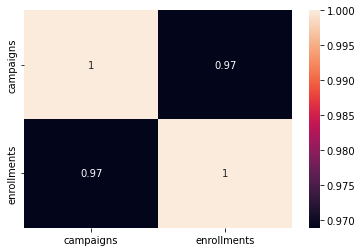

In [15]:
df_viz = sns.heatmap(df[['campaigns','enrollments']].corr(), annot=True)

- There is a strong positive relationship between number of campaigns launched and number of students that enrolled.

In [16]:
# Check categorical columns that needs to be converted to numeric columns. O is AKA object
cat_columns = [x for x in df.columns if df[x].dtype == 'O']
cat_columns

[]

In [17]:
# Check numeric columns.
num_columns = [x for x in df.columns if df[x].dtype == 'int64']
num_columns

['campaigns', 'enrollments']

### Linear Regression Algorithm

In [18]:
from sklearn import metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

#### Split data into Train and Test

In [19]:
# Define the features or independent variable
X = df.drop(['enrollments'], axis=1)

# Define the label or dependent variable
y = df['enrollments']

In [20]:
# Split the data into training(80%) and testing(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#to check the shape of the data after spliting.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22, 1), (6, 1), (22,), (6,))

#### Create the Model and Fit the Model.

In [21]:
from sklearn.linear_model import LinearRegression


regressor = LinearRegression() #linearregression() function assigned to regressor

regressor.fit(X_train, y_train) #regressor.fit() performs the actual training on X and y.

LinearRegression()

In [22]:
y_pred = regressor.predict(X_test)
y_pred

array([28.76053963, 70.95278246,  7.66441821, 18.21247892, 18.21247892,
       60.40472175])

In [23]:
#to retrieve the slope or coef
print(regressor.coef_)

#to retrieve the intercept
print(regressor.intercept_)

[10.54806071]
-2.8836424957841515


- For every marketing campaign launched, there is ~ 11 enrolled student.

#### Evaluating the model

In [24]:
#check prediction score
regressor.score(X_test, y_test)

0.9500335759329622

#### Predicting the test results

In [25]:
#now, lets see the prediction on which th accuracy level is achieved.
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
df = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted' : y_pred.flatten()})
df

,Actual,Predicted
0,27,28.760540
1,76,70.952782
2,17,7.664418
3,24,18.212479
4,20,18.212479
5,62,60.404722


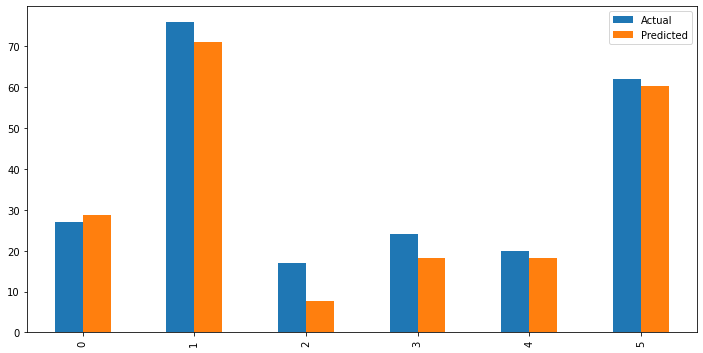

In [26]:
df1 = df.head(6)
df1.plot(kind='bar',figsize=(12,6))
# plt.grid(which='major', linestyle='-', linewidth='0.8', color='blue')
# plt.grid(which='minor', linestyle=':', linewidth='0.8', color='red')
plt.show()

### Model Validation

In [45]:
#let's validate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2:', metrics.r2_score(y_true=y_test, y_pred=y_pred))

Mean Absolute Error: 4.218943226531757
Mean Squared Error: 25.82708941776221
Root Mean Squared Error: 5.082035952033615
r2: 0.9500335759329622
